In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from functools import reduce
import math
import itertools

from IPython.display import display


categories = ['Сериал', 'Полнометражный', 'Мини-сериал']

categoriesMatrix = [
    [1, 0, 0.5],
    [0, 1, 0],
    [0.5, 0, 1],
]


def getSimilarsByID(df, dfFull, metric, id):
    r = []
    for i in range(len(df.values.tolist())):
        r.append(metric(df.values.tolist()[id], df.values.tolist()[i]))
    return pd.DataFrame(list(zip(r, map(lambda e: str(" ".join(e[:4])), dfFull.values.tolist()))),
                        index=np.arange(len(r)), columns=['Степень различия', 'Тип вещи'])


def manhattanDistance(a, b):
    D = 0
    for i in range(len(a)):
        D += abs(a[i] - b[i])
    return D


def euclideanDistance(a, b):
    D = 0
    for i in range(len(a)):
        D += pow(a[i] - b[i], 2)
    return math.sqrt(D)


def printCollerationMatrix(df, metric):
    matr = []
    for i in range(len(df.values.tolist())):
        r = []
        for k in range(len(df.values.tolist())):
            r.append(metric(df.values.tolist()[i], df.values.tolist()[k]))
        matr.append(np.array(r))

    matr = np.array(matr)

    plt.imshow(matr)
    plt.colorbar()
    
    plt.xticks(np.arange(0, len(df.values.tolist())), rotation=-45)
    plt.yticks(np.arange(0, len(df.values.tolist())))
    figure(figsize=(20, 20), dpi=160)
    plt.show()


dfFull = pd.read_csv('./dataset.txt', delimiter=',', encoding="utf8")

display(dfFull)

,Название,Страна,Категория,Канал,Жанр,Год,Режиссер,Актеры,Теги,Рейтинг,Количество серий,Озвучка
0,Лёгкая улыбка покоряет мир,Китай,Сериал,JSTV,романтика,2016,Линь Юй Фэнь,"Чжэн Шуан,Ян Ян","игры,университет,спорт",4.5,30,Да
1,Влюбиться в твою улыбку,Китай,Сериал,Tencent Video,"романтика,комедия",2021,Цю Чжун Вэй,"Сюй Кай,Чэн Сяо","киберспорт,игры",4.5,31,Нет
2,Ты мой триумф,Китай,Сериал,Tencent Video,"романтика,комедия",2021,\r\nВан Чжи,"Дильраба Дильмурат,Ян Ян","игры,знаменитости,инженеры",5.0,32,Да
3,Girlfriend,Китай,Сериал,Mango TV,"романтика,комедия",2020,Мин Янь,"Сюй Хао,У Хао Цзэ,Ван Гуань И,Ни Хань Цзинь",знаменитости,4.5,36,Да
4,Поразительное на каждом шагу,Китай,Сериал,Hunan TV,"фантастика,драма,исторический,романтика",2011,У Цзинь Юань,"Лю Ши Ши,Никки Ву,Кевин Чэн,Юань Хун,Линь Гэн ...","путешествия во времени,королевская семья,жесто...",4.5,35,Да
5,Императрица Китая,Китай,Сериал,Hunan TV,"политика,романтика,исторический,биография",2014,Гао И Цзюнь,"Фань Бин Бин,Чжан Фэн И,Аариф Рахман","королевская семья,убийцы,жестокость",4.5,82,Да
6,"Люби меня, если осмелишься",Китай,Сериал,Dragon TV,"детектив,романтика,триллер,психология,мелодрама",2015,: Чжан Кай Чжоу,"Ма Сы Чунь,Уоллес Хо","убийцы,жестокость,полиция",4.5,24,Да
7,Так я женился на антифанатке,Китай,Полнометражный,-,"романтика,комедия",2016,Цзинь Ди Жун,"Юань Шань Шань,Пак Чан Ёль","знаменитости,музыка",4.5,1,Да
8,Алые сердца: Корё,Южная Корея,Сериал,SBS,"мелодрама,исторический,романтика,фантастика,драма",2016,Ким Гю Тхэ,"Ли Джун Ки,АйЮ","путешествия во времени,королевская семья,жесто...",4.5,20,Да
9,Вера,Южная Корея,Сериал,SBS,"исторический,фантастика,романтика,драма",2012,Ким Чон Хак,"Ю О Сон,Ким Хи Сон,Ли Мин Хо","история,путешествия во времени,королевская сем...",4.5,24,Да


In [2]:
df = dfFull.copy(deep=True)

del df["Название"]

df["Страна"], _ = pd.factorize(df["Страна"])
df["Канал"], _ = pd.factorize(df["Канал"])
df["Канал"] = df["Канал"].values / max(df["Канал"].values)
df["Озвучка"], _ = pd.factorize(df["Озвучка"])
df["Режиссер"], _ = pd.factorize(df["Режиссер"])

df["Год"] = df["Год"].map(lambda e: float(e))
df["Год"] = (df["Год"].values - min(df["Год"].values)) / (max(df["Год"].values) - min(df["Год"].values))

df["Рейтинг"] = df["Рейтинг"].map(lambda e: float(e))
df["Рейтинг"] = df["Рейтинг"].values / max(df["Рейтинг"].values)

df["Количество серий"] = df["Количество серий"].map(lambda e: float(e))
df["Количество серий"] = df["Количество серий"].values / max(df["Количество серий"].values)

df["Жанр"] = df["Жанр"].map(lambda e: str(e).split(','))

df["Теги"] = df["Теги"].map(lambda e: str(e).split(','))
df["Актеры"] = df["Актеры"].map(lambda e: str(e).split(','))

genres = list(set(itertools.chain.from_iterable(df["Жанр"].values)))
# print(genres)

tags = list(set(itertools.chain.from_iterable(df["Теги"].values)))
# print(tags)

actors = list(set(itertools.chain.from_iterable(df["Актеры"].values)))
# display(actors)

for genre in genres:
    df[genre] = df["Жанр"].map(lambda e: 1 if (genre in e) else 0)

for tag in tags:
    df[tag] = df["Теги"].map(lambda e: 1 if (tag in e) else 0)

for actor in actors:
    df[actor] = df["Актеры"].map(lambda e: 1 if (actor in e) else 0)

for i in range(len(categories)):
    df[categories[i]] = df['Категория'].map(lambda e: categoriesMatrix[i][categories.index(e)])

del df["Жанр"]
del df['Теги']
del df['Категория']
del df["Режиссер"]
del df["Актеры"]

display(df)

,Страна,Канал,Год,Рейтинг,Количество серий,Озвучка,драма,детектив,триллер,фэнтези,мелодрама,школа,комедия,психология,саспенс,исторический,боевик,фантастика,биография,гендерная интрига,политика,трагедия,криминал,романтика,музыкальный,история,боевые искусства,убийцы,смерть,королевская семья,знаменитости,шпионы,инженеры,киберспорт,привидения,сверхспособности,полные девушки,полиция,юристы,спорт,...,Ни Хань Цзинь,Чхве Джин Хёк,Фань Бин Бин,Линь Гэн Синь,Ма Сы Чунь,Чу Чжин Мо,Сухо,Гиль Хэ Ён,Ким На Хён,Никки Ву,Чжан Фэн И,Йери,Кевин Чэн,Ли Бо Ён,Ян Хак Джин,Пак Мин Ён,Юн Сан Хён,Син Йе Ын,Ким А Джун,Ким Сыль Ги,Лю Ши Ши,Ли Ха На,Ли Джун Хёк,Мун Джу Вон,Ю О Сон,АйЮ,Чон Ун Ин,Чжи У,Ким Хи Сон,Ли Сан Ёп,Ли Чон Сок,Ю Джи Тхэ,Аариф Рахман,Ха Чжи Вон,Ли Да Хи,Ян Хон Сок,Чжэн Шуан,Сериал,Полнометражный,Мини-сериал
0,0,0.000000,0.666667,0.9,0.365854,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0,0.5
1,0,0.090909,1.000000,0.9,0.378049,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0.5
2,0,0.090909,1.000000,1.0,0.390244,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0.5
3,0,0.181818,0.933333,0.9,0.439024,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0.5
4,0,0.272727,0.333333,0.9,0.426829,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0.5
5,0,0.272727,0.533333,0.9,1.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,0,0.5
6,0,0.363636,0.600000,0.9,0.292683,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0.5
7,0,0.454545,0.666667,0.9,0.012195,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0.0
8,1,0.545455,0.666667,0.9,0.243902,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0.5
9,1,0.545455,0.400000,0.9,0.292683,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0,0.5


manhattanDistance


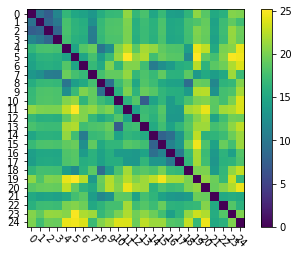

<Figure size 3200x3200 with 0 Axes>

In [3]:
print("manhattanDistance")
printCollerationMatrix(df, manhattanDistance)

In [ ]:
result = getSimilarsByID(df, dfFull, manhattanDistance, 4)
display(result.sort_values('Степень различия'))

,Степень различия,Тип вещи
4,0.000000,Поразительное на каждом шагу Китай Сериал Huna...
8,9.788987,Алые сердца: Корё Южная Корея Сериал SBS
9,12.473540,Вера Южная Корея Сериал SBS
18,14.064819,Императрица Ки Южная Корея Сериал MBC
5,14.773171,Императрица Китая Китай Сериал Hunan TV
21,15.305469,Брызги любви Южная Корея Мини-сериал MBC
0,16.667036,Лёгкая улыбка покоряет мир Китай Сериал JSTV
3,17.703104,Girlfriend Китай Сериал Mango TV
1,17.897265,Влюбиться в твою улыбку Китай Сериал Tencent V...
2,17.985070,Ты мой триумф Китай Сериал Tencent Video


euclideanDistance


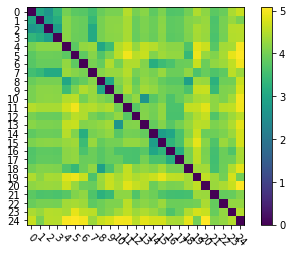

<Figure size 3200x3200 with 0 Axes>

In [ ]:
print("euclideanDistance")
printCollerationMatrix(df, euclideanDistance)

In [ ]:
result = getSimilarsByID(df, dfFull, euclideanDistance, 4)
display(result.sort_values('Степень различия'))

,Степень различия,Тип вещи
4,0.000000,Поразительное на каждом шагу Китай Сериал Huna...
8,3.036273,Алые сердца: Корё Южная Корея Сериал SBS
9,3.478048,Вера Южная Корея Сериал SBS
18,3.670260,Императрица Ки Южная Корея Сериал MBC
21,3.760057,Брызги любви Южная Корея Мини-сериал MBC
5,3.790584,Императрица Китая Китай Сериал Hunan TV
0,4.023582,Лёгкая улыбка покоряет мир Китай Сериал JSTV
3,4.167543,Girlfriend Китай Сериал Mango TV
1,4.180895,Влюбиться в твою улыбку Китай Сериал Tencent V...
2,4.181966,Ты мой триумф Китай Сериал Tencent Video


Correlation


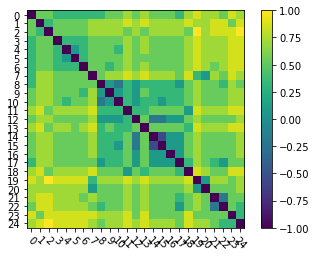

<Figure size 3200x3200 with 0 Axes>

In [4]:
def diff_corr(t1, t2):
    del t1[8]
    del t1[7]
    del t1[4]
    del t1[0]

    del t2[8]
    del t2[7]
    del t2[4]
    del t2[0]

    t1, t2 = set(t1), set(t2)
    a = len(t1 - t2)
    b = len(t2 - t1)
    c = len(t1 & t2)

    return (a + b - c) / (a + b + c)  # Формула Стругана-Радулеску


print("Correlation")
printCollerationMatrix(dfFull, diff_corr)

In [ ]:
result = getSimilarsByID(dfFull, dfFull, diff_corr, 4)
display(result.sort_values('Степень различия'))

,Степень различия,Тип вещи
4,-1.000000,Поразительное на каждом шагу Китай Сериал Huna...
5,0.090909,Императрица Китая Китай Сериал Hunan TV
0,0.333333,Лёгкая улыбка покоряет мир Китай Сериал JSTV
3,0.333333,Girlfriend Китай Сериал Mango TV
6,0.333333,"Люби меня, если осмелишься Китай Сериал Dragon TV"
10,0.333333,Городской охотник Южная Корея Сериал SBS
17,0.538462,W: Меж двух миров Южная Корея Сериал MBC
16,0.538462,Этот психометрический парень Южная Корея Сериа...
15,0.538462,Туннель Южная Корея Сериал OCN
14,0.538462,Голос Южная Корея Сериал OCN


Tree difference


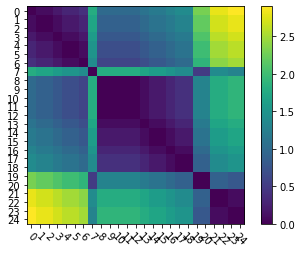

<Figure size 3200x3200 with 0 Axes>

In [5]:
tree = [[],
        ["Китай", "Южная Корея"],
        ["Сериал", "Полнометражный", "Мини-сериал"],
        ["JSTV", "Tencent Video", "Mango TV", "Hunan TV", "Dragon TV", "SBS", "KBS2", "OCN", "tvN", "MBC",
         "Naver TV Cast", "-"]]

weights = [.5, .7, .1]


def diff_tree(t1, t2):
    subtree1 = t1
    subtree2 = t2
    difftree = []
    for i in range(1, 4):
        difftree.append(abs(tree[i].index(subtree1[i]) - tree[i].index(subtree2[i])))

    similarity = 0
    for i in range(len(difftree)):
        similarity += difftree[i] * weights[i]

    return similarity

print("Tree difference")
printCollerationMatrix(dfFull, diff_tree)

In [ ]:
result = getSimilarsByID(dfFull, dfFull, diff_tree, 4)
display(result.sort_values('Степень различия'))

,Степень различия,Тип вещи
4,0.0,Поразительное на каждом шагу Китай Сериал Huna...
5,0.0,Императрица Китая Китай Сериал Hunan TV
3,0.1,Girlfriend Китай Сериал Mango TV
6,0.1,"Люби меня, если осмелишься Китай Сериал Dragon TV"
1,0.2,Влюбиться в твою улыбку Китай Сериал Tencent V...
2,0.2,Ты мой триумф Китай Сериал Tencent Video
0,0.3,Лёгкая улыбка покоряет мир Китай Сериал JSTV
11,0.7,Я слышу твой голос Южная Корея Сериал SBS
10,0.7,Городской охотник Южная Корея Сериал SBS
12,0.7,Пока ты спишь Южная Корея Сериал SBS


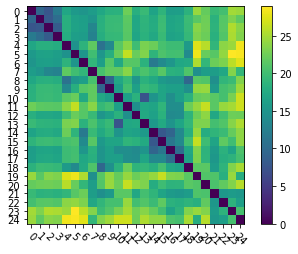

<Figure size 3200x3200 with 0 Axes>

,Степень различия,тип
14,0.000000,Голос Южная Корея Сериал OCN
15,8.000000,Туннель Южная Корея Сериал OCN
16,9.374242,Этот психометрический парень Южная Корея Сериа...
6,11.794531,"Люби меня, если осмелишься Китай Сериал Dragon TV"
17,13.548485,W: Меж двух миров Южная Корея Сериал MBC
10,14.930599,Городской охотник Южная Корея Сериал SBS
13,15.589690,Хилер Южная Корея Сериал KBS2
12,16.481818,Пока ты спишь Южная Корея Сериал SBS
0,16.764671,Лёгкая улыбка покоряет мир Китай Сериал JSTV
11,16.872875,Я слышу твой голос Южная Корея Сериал SBS


In [6]:
def create_matrix(df, metric):
    matr = []
    for i in range(len(df.values.tolist())):
        r = []
        for k in range(len(df.values.tolist())):
            r.append(metric(df.values.tolist()[i], df.values.tolist()[k]))
        matr.append(np.array(r))

    return np.array(matr)

def tree_and_menhetten(df, dfFull):
    tree = create_matrix(dfFull, diff_tree)
    m = create_matrix(df, manhattanDistance)
    result = 1.5*tree + m
    return result

def show_matrix(matr):
    plt.imshow(matr)
    plt.colorbar()
    
    plt.xticks(np.arange(0, len(df.values.tolist())), rotation=-45)
    plt.yticks(np.arange(0, len(df.values.tolist())))
    figure(figsize=(20, 20), dpi=160)
    plt.show()

def get_similars_from_matrix(dfFull, matr, id):
     return pd.DataFrame(list(zip(matr[id], map(lambda e: str(" ".join(e[:4])), dfFull.values.tolist()))),
                        index=np.arange(len(matr[id])), columns=['Степень различия', 'тип'])

resultMatrix = tree_and_menhetten(df, dfFull)
show_matrix(resultMatrix)

result = get_similars_from_matrix(dfFull, resultMatrix, 14)
display(result.sort_values('Степень различия'))




In [60]:
def getSimilarsByGroupID(dfFull, similarsMatrix, likeIDs, disIDs):

    
    disliked_result = []
    for id in disIDs:
        res = get_similars_from_matrix(dfFull, similarsMatrix, id)
#         print(res.sort_values('Степень различия')[: 5])
        if len(disliked_result) == 0: 
            disliked_result = res['Степень различия']
        else:
            for i in range(len(disliked_result)):
                disliked_result[i] = disliked_result[i] if disliked_result[i] < res['Степень различия'][i] else res['Степень различия'][i]
    # print('dislikes')
    # print(disliked_result)

    liked_result = []
    for id in likeIDs:
        res = get_similars_from_matrix(dfFull, similarsMatrix, id)
        
        if len(liked_result) == 0: 
            liked_result = res['Степень различия']
        else:
            for i in range(len(liked_result)):
                liked_result[i] = liked_result[i] if liked_result[i] < res['Степень различия'][i] else res['Степень различия'][i]
    # print('likes')
    # print(liked_result)

    result = liked_result
    if len(disliked_result) > 0:
        disliked_max = max(disliked_result.values)
        disliked_result = disliked_result * (-1) + disliked_max
        # print('dislikes')
        # print(disliked_result)

        result = liked_result + disliked_result
    # print('result')
    # print(result)

    print(list(map(lambda x: [x[0]] + x[1], list(zip(result, dfFull.values.tolist())))))
    print(['Степень различия'] + list(dfFull.columns.values))

    return pd.DataFrame(list(map(lambda x: [x[0]] + x[1], list(zip(result, dfFull.values.tolist())))),
                        index=np.arange(len(result)), columns=['Степень различия'] + list(dfFull.columns.values))


# resultMatrix = tree_and_menhetten(df, dfFull)
# result = getSimilarsByGroupID(dfFull, resultMatrix, [1, 2, 3], [4,5,6])
# display(result.sort_values('Степень различия'))

In [61]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
from IPython.display import clear_output 

@interact(algorithm=["manhattanDistance", "euclideanDistance", "tree", "corr", "manhattan+tree"])
def a(algorithm = 'manhattan+tree', favourites =  "4, 18",disliked =  "15, 19" ):

#     clear_output()
#     out = widgets.Output()
#     dout.append_stdout
#     with out:
        print("Поиск... ")

        if algorithm == "manhattanDistance":
          matrix = create_matrix(df, manhattanDistance)
        elif algorithm == "euclideanDistance":
          matrix = create_matrix(df, euclideanDistance)
        elif algorithm == "tree":
          func = diff_tree
          matrix = create_matrix(dfFull, func)
        elif algorithm == "corr":
          func = diff_corr
          matrix = create_matrix(dfFull, func)
        elif algorithm == "manhattan+tree":
          matrix = tree_and_menhetten(df, dfFull)

        #print("Похожие товары:\n", getSimilarsByID(dataset, dfFull, func, id).sort_values("Степень различия"))

#         if printSimilarityMatrix == True:
#           plt.plot(id,id,'r*') 
#           show_matrix(matrix)

        result = getSimilarsByGroupID(dfFull, matrix, np.fromstring(favourites, dtype=int, sep=','), np.fromstring(disliked, dtype=int, sep=','))
        return result.sort_values('Степень различия')
#     display(out)


interactive(children=(Dropdown(description='algorithm', index=4, options=('manhattanDistance', 'euclideanDista…

In [57]:
res = ['blabla'] + list(dfFull.columns.values)
print(res)

['blabla', 'Название', 'Страна', 'Категория', 'Канал', 'Жанр', 'Год', 'Режиссер', 'Актеры', 'Теги', 'Рейтинг', 'Количество серий', 'Озвучка']


In [47]:
result = dfFull['Название']
res =  list(map(lambda x: [x[0]] + x[1], list(zip(result, dfFull.values.tolist()))))
print(res)

[['Лёгкая улыбка покоряет мир', 'Лёгкая улыбка покоряет мир', 'Китай', 'Сериал', 'JSTV', 'романтика', 2016, 'Линь Юй Фэнь', 'Чжэн Шуан,Ян Ян', 'игры,университет,спорт', 4.5, 30, 'Да'], ['Влюбиться в твою улыбку', 'Влюбиться в твою улыбку', 'Китай', 'Сериал', 'Tencent Video', 'романтика,комедия', 2021, 'Цю Чжун Вэй', 'Сюй Кай,Чэн Сяо', 'киберспорт,игры', 4.5, 31, 'Нет'], ['Ты мой триумф', 'Ты мой триумф', 'Китай', 'Сериал', 'Tencent Video', 'романтика,комедия', 2021, '\r\nВан Чжи', 'Дильраба Дильмурат,Ян Ян', 'игры,знаменитости,инженеры', 5.0, 32, 'Да'], ['Girlfriend', 'Girlfriend', 'Китай', 'Сериал', 'Mango TV', 'романтика,комедия', 2020, 'Мин Янь', 'Сюй Хао,У Хао Цзэ,Ван Гуань И,Ни Хань Цзинь', 'знаменитости', 4.5, 36, 'Да'], ['Поразительное на каждом шагу', 'Поразительное на каждом шагу', 'Китай', 'Сериал', 'Hunan TV', 'фантастика,драма,исторический,романтика', 2011, 'У Цзинь Юань', 'Лю Ши Ши,Никки Ву,Кевин Чэн,Юань Хун,Линь Гэн Синь', 'путешествия во времени,королевская семья,жесток

In [53]:
['blabla'] + ['1', '2', '3']

['blabla', '1', '2', '3']